In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import os
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model_path = "./Models/flower_recognition_model_SGD_6_classes__250_epochs.h5"

In [14]:
model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)

In [15]:
model.compile()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
Total params: 22,069,712
Trainable params: 22,035,280
No

Flowers\Babi\babi_1.jpg
Flowers\Calimerio\calimero_0.jpg
Flowers\Chrysanthemum\chrysanthemum_1.jpg
Flowers\Hydrangeas\hydrangeas_1.jpg
Flowers\Lisianthus\lisianthus_1.jpg
Flowers\Pingpong\pingpong_1.jpg
Flowers\Rosy\rosy_1.jpg
Flowers\Tana\tana_1.jpg


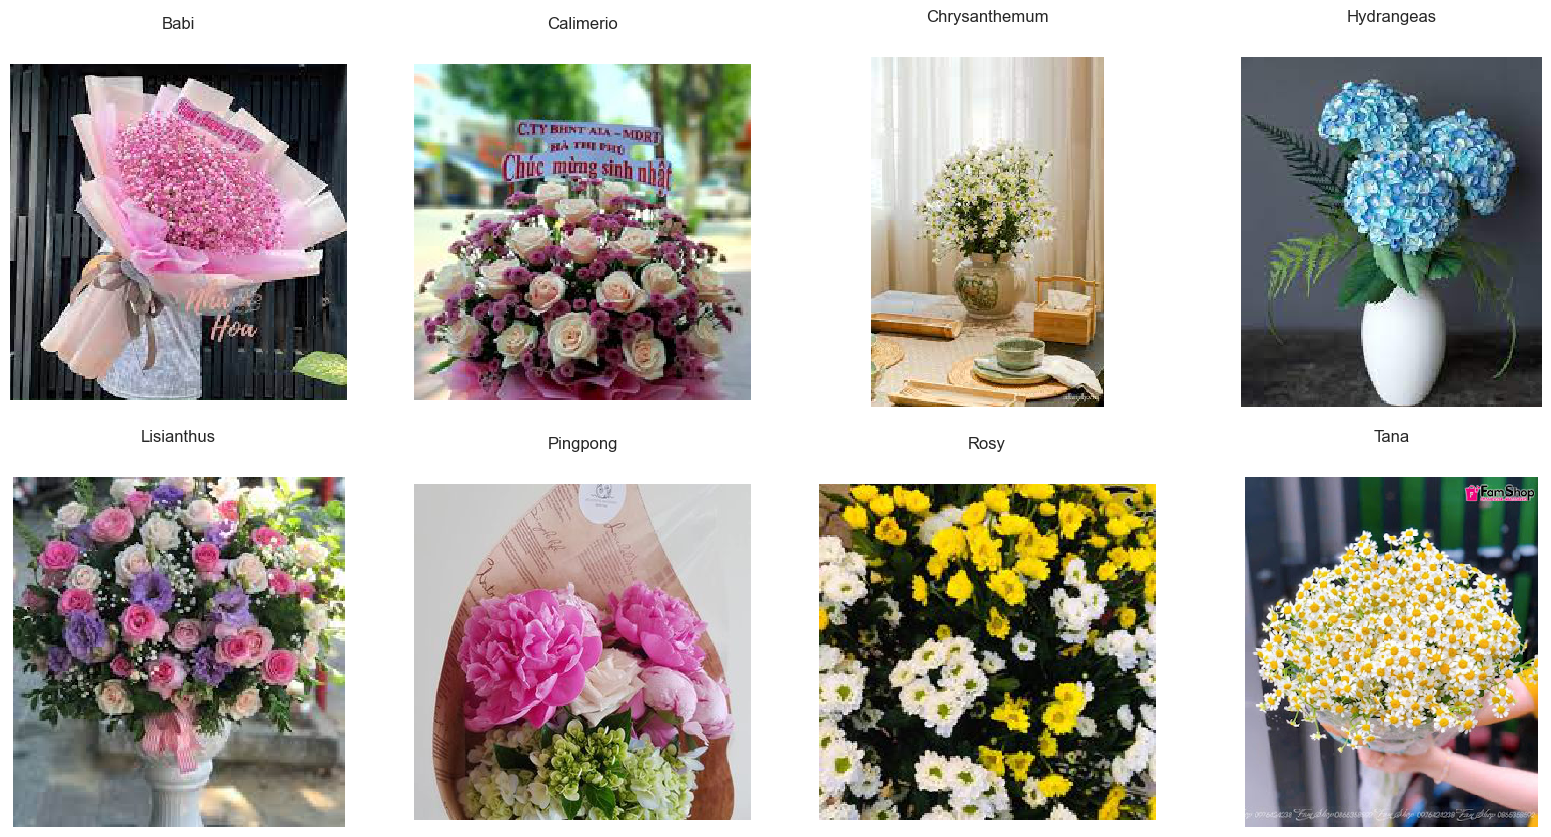

In [ ]:
import random

flowers_dir = './Flowers/'
flower_labels = sorted(os.listdir(flowers_dir))
flower_labels

X = []
y = []
chosen_flower = flower_labels.copy()


img_size = 256

fig,ax = plt.subplots(2, 4, figsize=(20,10))
ax=ax.flatten()

flowers_dir_path_object = pathlib.Path(flowers_dir)

for label_number,flower in enumerate(chosen_flower):
    flower_images_paths = list(flowers_dir_path_object.glob(f'{flower}/*.jpg'))
    ax[label_number].set_title(flower.capitalize())
    ax[label_number].axis('off')
    print(flower_images_paths[0].__str__())
    flower_img = np.array(load_img(flower_images_paths[0].__str__()))
    ax[label_number].matshow(flower_img)
    for image in flower_images_paths:
        resized_image = load_img(str(image),target_size=(img_size, img_size))
        y.append(label_number)
        X.append(np.array(resized_image))
        
X = np.array(X)
y = np.array(y)

In [ ]:
model.evaluate(X, y)

145/145 [==============================] - 1s 8ms/step - loss: 0.2279


0.22789335250854492

In [80]:
y_hat = model.predict(X)

145/145 [==============================] - 31s 217ms/step


In [81]:
y_hat_label = np.array([i.argmax() for i in y_hat])
y_hat_label.shape

(4621,)

In [82]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y, y_hat_label)

FN = tf.keras.metrics.FalseNegatives(
    thresholds=None, name=None, dtype=None
)
FN.update_state(y, y_hat_label)

FP = tf.keras.metrics.FalsePositives(
    thresholds=None, name=None, dtype=None
)
FP.update_state(y, y_hat_label)

CA = tf.keras.metrics.Accuracy(
    name='categorical_accuracy', dtype=None
)
CA.update_state(y, y_hat_label)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=4621.0>

In [86]:
print(m.result().numpy())
print("FN:", FN.result().numpy())
print("FP:", FP.result().numpy())
print("accuracy:", CA.result().numpy())

0.7567375
FN: 523.0
FP: 321.0
accuracy: 0.42653105


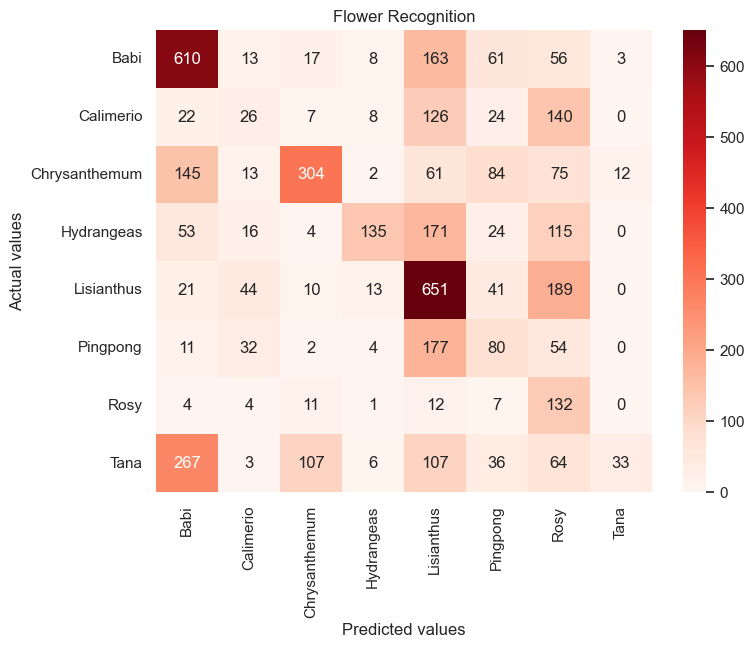

In [87]:
confusion_matrix_result = confusion_matrix(y, y_hat_label)

labels = flower_labels
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Flower Recognition')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [129]:
def test_prediction(image_path: str):
    im = Image.open(image_path)
    display(im)
    flower_img_test = np.array(load_img(image_path, target_size=(img_size, img_size)))
    # flower_img_test.shape
    prediction = model.predict(np.array([flower_img_test]))
    max_index = prediction.argmax()
    print(image_path)
    for k, v in enumerate(flower_labels):
        print(flower_labels[k], f'{round(prediction[0][k] * 100, 2)}%')

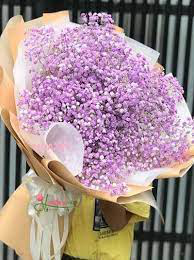

1/1 [==============================] - 0s 30ms/step
Flowers/Babi/babi_100.jpg
Babi 91.58%
Calimerio 0.46%
Chrysanthemum 0.21%
Hydrangeas 0.03%
Lisianthus 4.28%
Pingpong 1.97%
Rosy 1.16%
Tana 0.28%


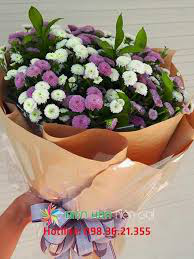

1/1 [==============================] - 0s 23ms/step
Flowers/Calimerio/calimero_100.jpg
Babi 1.04%
Calimerio 6.31%
Chrysanthemum 0.16%
Hydrangeas 2.07%
Lisianthus 86.27%
Pingpong 0.99%
Rosy 2.68%
Tana 0.2%


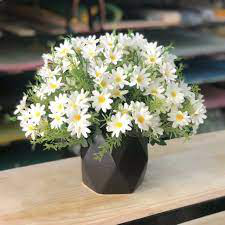

1/1 [==============================] - 0s 25ms/step
Flowers/Chrysanthemum/chrysanthemum_100.jpg
Babi 0.56%
Calimerio 0.58%
Chrysanthemum 95.42%
Hydrangeas 0.08%
Lisianthus 0.0%
Pingpong 2.15%
Rosy 0.8%
Tana 0.39%


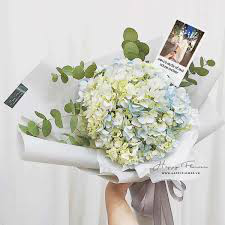

1/1 [==============================] - 0s 23ms/step
Flowers/Hydrangeas/hydrangeas_150.jpg
Babi 6.31%
Calimerio 8.85%
Chrysanthemum 1.95%
Hydrangeas 45.6%
Lisianthus 3.41%
Pingpong 0.99%
Rosy 32.04%
Tana 0.68%


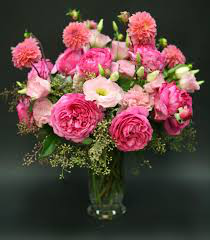

1/1 [==============================] - 0s 23ms/step
Flowers/Lisianthus/lisianthus_100.jpg
Babi 1.87%
Calimerio 2.27%
Chrysanthemum 0.63%
Hydrangeas 9.52%
Lisianthus 52.42%
Pingpong 2.87%
Rosy 27.69%
Tana 1.47%


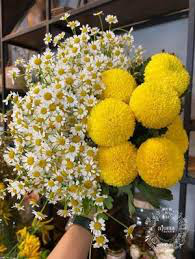

1/1 [==============================] - 0s 23ms/step
Flowers/Pingpong/pingpong_100.jpg
Babi 1.38%
Calimerio 0.34%
Chrysanthemum 1.68%
Hydrangeas 0.27%
Lisianthus 0.69%
Pingpong 90.49%
Rosy 3.84%
Tana 0.84%


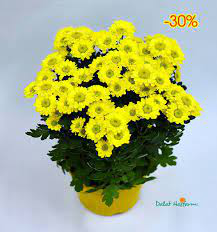

1/1 [==============================] - 0s 23ms/step
Flowers/Rosy/rosy_100.jpg
Babi 2.31%
Calimerio 4.14%
Chrysanthemum 3.42%
Hydrangeas 8.99%
Lisianthus 0.02%
Pingpong 2.69%
Rosy 78.22%
Tana 0.11%


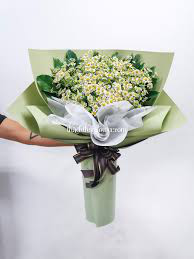

1/1 [==============================] - 0s 23ms/step
Flowers/Tana/tana_100.jpg
Babi 5.29%
Calimerio 1.88%
Chrysanthemum 0.5%
Hydrangeas 3.12%
Lisianthus 62.44%
Pingpong 3.48%
Rosy 21.93%
Tana 1.05%


In [132]:
test_arr = ["Flowers/Babi/babi_100.jpg",
"Flowers/Calimerio/calimero_100.jpg",
"Flowers/Chrysanthemum/chrysanthemum_100.jpg",
"Flowers/Hydrangeas/hydrangeas_150.jpg",
"Flowers/Lisianthus/lisianthus_100.jpg",
"Flowers/Pingpong/pingpong_100.jpg",
"Flowers/Rosy/rosy_100.jpg",
"Flowers/Tana/tana_100.jpg"]
for i in test_arr:
    test_prediction(i)